In [1]:
from sklearn import datasets
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [5]:
df_original = pd.read_csv("MCMV.csv", encoding="cp860", index_col=False)

In [10]:
df_original.head()

,FID,UF,COD_IBGE,CAPITAIS,XCOORD,YCOORD,Municipio,UF_1,Faixa_de_r,Produto,...,Concluidas,Entregues,Sub_FGTS,Sub_OGU,Percentual,IF,PMCMV,Faixa,UH_CONC,the_geom
0,MCMV.20227,DF,530010,Capital,-47.9297,-15.7797,Bras├¡lia,NaN,Faixa 3,CCFGTS,...,0,0,0.0,0.0,89.92,Caixa,1,75-95,40,POINT (-47.92972 -15.779719999999884)
1,MCMV.20199,DF,530010,Capital,-47.9297,-15.7797,Bras├¡lia,NaN,Faixa 3,CCFGTS,...,166,166,0.0,0.0,100.00,Caixa,1,95-100,0,POINT (-47.92972 -15.779719999999884)
2,MCMV.20200,DF,530010,Capital,-47.9297,-15.7797,Bras├¡lia,NaN,Faixa 3,CCFGTS,...,198,198,0.0,0.0,100.00,Caixa,2,95-100,0,POINT (-47.92972 -15.779719999999884)
3,MCMV.20201,DF,530010,Capital,-47.9297,-15.7797,Bras├¡lia,NaN,Faixa 2,CCFGTS,...,0,0,1378130.0,459376.0,0.00,Caixa,2,0-50,416,POINT (-47.92972 -15.779719999999884)
4,MCMV.20202,DF,530010,Capital,-47.9297,-15.7797,Bras├¡lia,NaN,Faixa 2,CCFGTS,...,0,0,0.0,0.0,1.00,Caixa,1,0-50,100,POINT (-47.92972 -15.779719999999884)


In [7]:
df = df_original

In [94]:
indices = []

for x in df.index:
  try:
    formated = int(df.Time[x].split(".")[0])
  except:
    indices.append(x)

df = df.drop(indices)

print("Indices:", indices)


Indices: [9357, 9358, 9359, 9360, 9361, 9362, 9363, 9364, 9365, 9366, 9367, 9368, 9369, 9370, 9371, 9372, 9373, 9374, 9375, 9376, 9377, 9378, 9379, 9380, 9381, 9382, 9383, 9384, 9385, 9386, 9387, 9388, 9389, 9390, 9391, 9392, 9393, 9394, 9395, 9396, 9397, 9398, 9399, 9400, 9401, 9402, 9403, 9404, 9405, 9406, 9407, 9408, 9409, 9410, 9411, 9412, 9413, 9414, 9415, 9416, 9417, 9418, 9419, 9420, 9421, 9422, 9423, 9424, 9425, 9426, 9427, 9428, 9429, 9430, 9431, 9432, 9433, 9434, 9435, 9436, 9437, 9438, 9439, 9440, 9441, 9442, 9443, 9444, 9445, 9446, 9447, 9448, 9449, 9450, 9451, 9452, 9453, 9454, 9455, 9456, 9457, 9458, 9459, 9460, 9461, 9462, 9463, 9464, 9465, 9466, 9467, 9468, 9469, 9470]


In [95]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [96]:
def formata_data(horario):
  try:
    res = int(horario.split(".")[0])
  except:
    print("Deu merda", horario)
    res = 0
  return res

df["Time"] = df["Time"].apply(formata_data)

In [97]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,NaN,NaN
9353,04/04/2005,11,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,NaN,NaN
9354,04/04/2005,12,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,NaN,NaN
9355,04/04/2005,13,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,NaN,NaN


In [98]:
np.unique(df["Time"])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

AttributeError: 'PairGrid' object has no attribute 'get_figure'

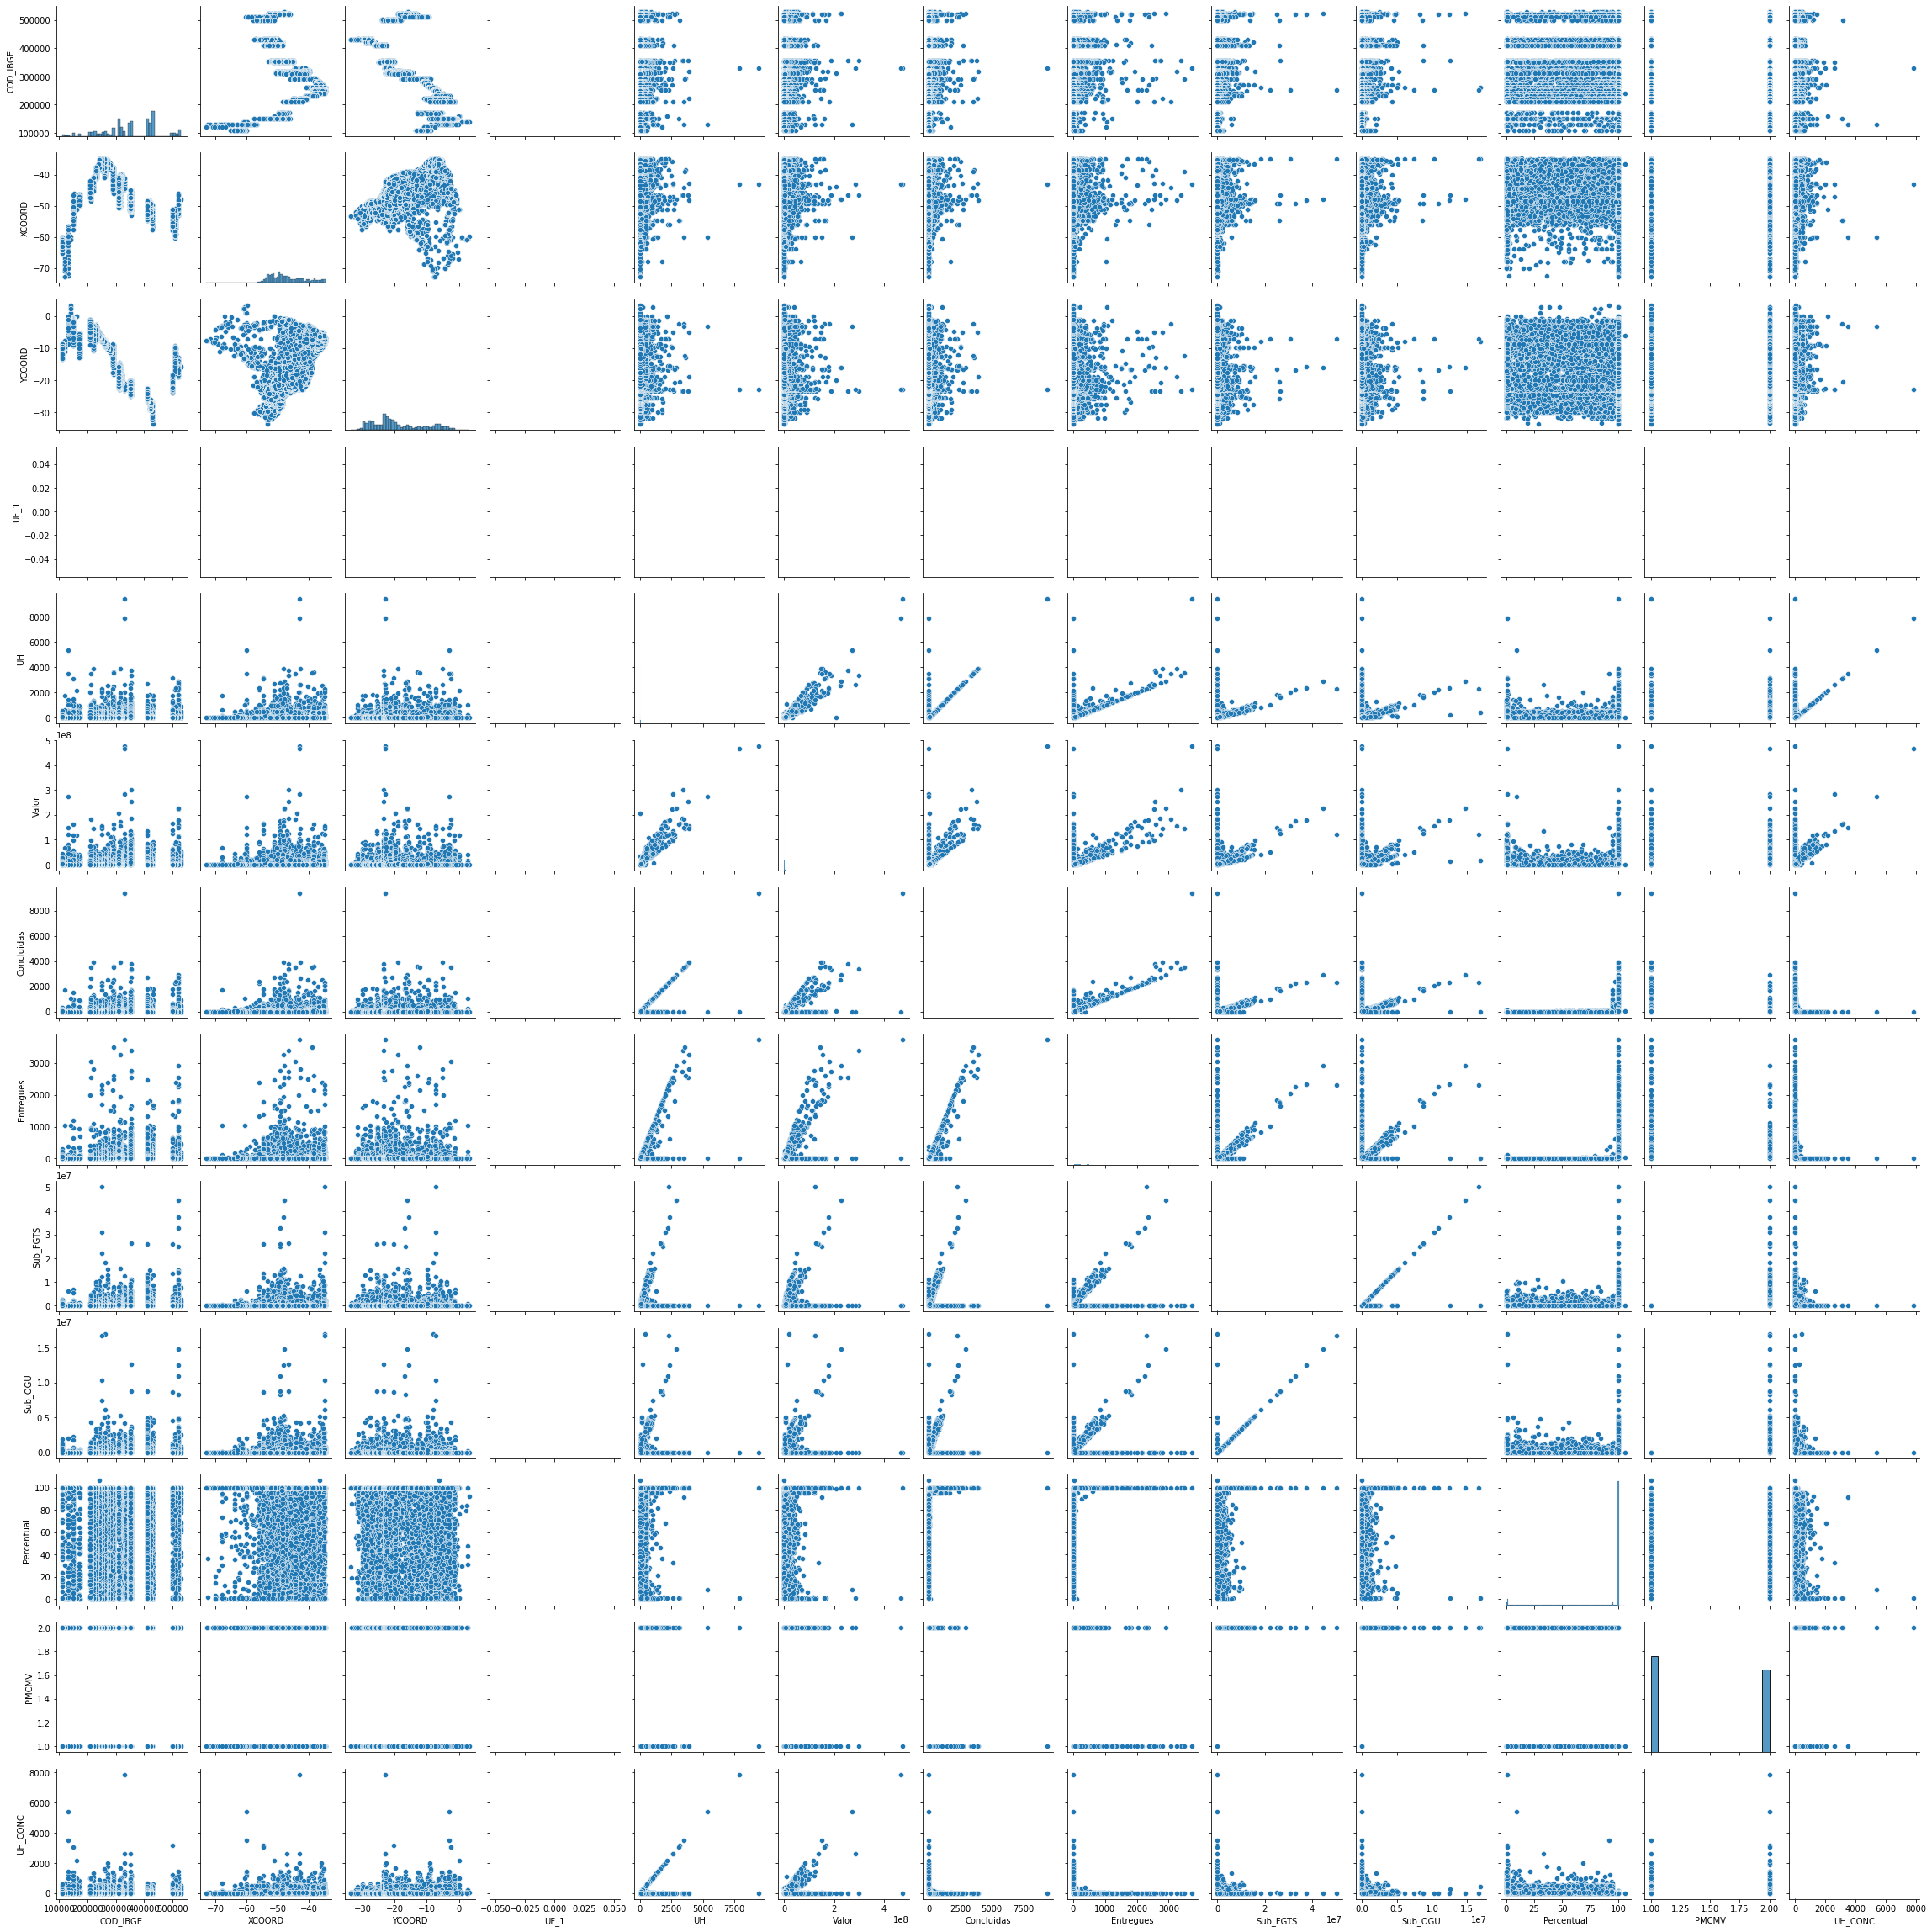

In [9]:
sns_plot = sns.pairplot(df)
fig = sns_plot.get_figure()
fig.savefig("output.png")

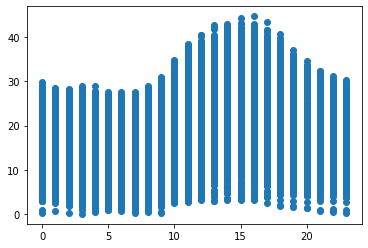

In [105]:
df_a = df[(df["T"] > 0)]

df_a = df_a[["Time", "T"]]

plt.scatter(df_a["Time"], df_a["T"])